In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
fashionMnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashionMnist.load_data()

9

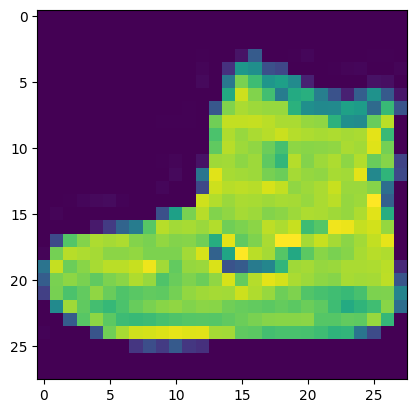

In [3]:
plt.imshow(x_train_full[0])
y_train_full[0]

In [4]:
classNames = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
classNames[y_train_full[0]]

'Ankle boot'

In [6]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [8]:
x_validation, x_train = x_train_n[:5000], x_train_n[5000:]
y_validation, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
weights, biases = model.layers[1].get_weights()

In [13]:
weights.shape

(784, 300)

In [14]:
weights

array([[-0.00508305,  0.05215836,  0.05876611, ...,  0.0262818 ,
        -0.00648657,  0.02930734],
       [-0.00113797, -0.02901367, -0.03642568, ...,  0.01819082,
        -0.02885195, -0.0390917 ],
       [-0.00529478,  0.00066973,  0.01394605, ..., -0.00613075,
         0.03792119,  0.00750829],
       ...,
       [ 0.04075509, -0.03000566,  0.07335904, ..., -0.07040542,
         0.05665423, -0.0224875 ],
       [ 0.01027336, -0.00879925,  0.05809781, ...,  0.04035752,
         0.00885896,  0.05804923],
       [-0.06400632, -0.06784328, -0.06216257, ..., -0.0059858 ,
         0.0263233 ,  0.05543375]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2209 - accuracy: 0.9202 - val_loss: 0.2958 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2176 - accuracy: 0.9220 - val_loss: 0.2945 - val_accuracy: 0.8928
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2139 - accuracy: 0.9237 - val_loss: 0.3614 - val_accuracy: 0.8696
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2097 - accuracy: 0.9258 - val_loss: 0.3088 - val_accuracy: 0.8902
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2089 - accuracy: 0.9245 - val_loss: 0.2891 - val_accuracy: 0.8954
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2031 - accuracy: 0.9282 - val_loss: 0.3100 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1998 - accuracy: 0.9295 - val_loss: 0.3023 - val_ac

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.22092419862747192,
  0.21764034032821655,
  0.21387924253940582,
  0.20973224937915802,
  0.2089070826768875,
  0.20307718217372894,
  0.1998482495546341,
  0.19813157618045807,
  0.1945943832397461,
  0.19139701128005981,
  0.18895278871059418,
  0.18435807526111603,
  0.18218545615673065,
  0.17959308624267578,
  0.1762022227048874,
  0.17479923367500305,
  0.17157243192195892,
  0.16814327239990234,
  0.16562509536743164,
  0.16272121667861938,
  0.16056624054908752,
  0.1585017889738083,
  0.1556020975112915,
  0.15311814844608307,
  0.15018989145755768,
  0.14760218560695648,
  0.14626839756965637,
  0.14309853315353394,
  0.14099545776844025,
  0.13878217339515686],
 'accuracy': [0.920199990272522,
  0.921963632106781,
  0.923690915107727,
  0.9258000254631042,
  0.9245454668998718,
  0.9282000064849854,
  0.9295272827148438,
  0.9299091100692749,
  0.9299454689025879,
  0.9311636090278625,
  0.9323272705078125,
  0.9343454837799072,
  0.9352545738220215,
  0.93632727

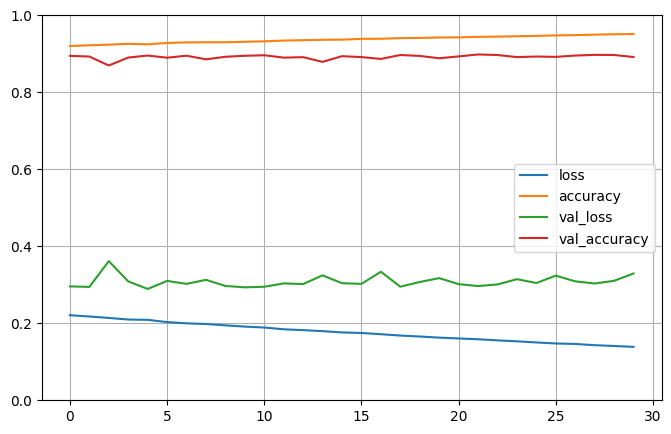

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3502 - accuracy: 0.8854


[0.3501988649368286, 0.8853999972343445]

In [22]:
x_new = x_test[:1]

In [23]:
y_prob = model.predict(x_new)

1/1 [==============================] - 0s 248ms/step


In [24]:
y_pred = np.argmax(model.predict(x_new),axis=1)
y_pred

1/1 [==============================] - 0s 51ms/step


array([9], dtype=int64)

In [25]:
np.array(classNames)[y_pred]

array(['Ankle boot'], dtype='<U11')

In [32]:
model.save("classifyImage.h5")